In [15]:
from PPairS.constants import collated_results_path
from PPairS.utils import models
import torch as t
import torch.nn.functional as F
import matplotlib.pyplot as plt


models = list(models.keys())

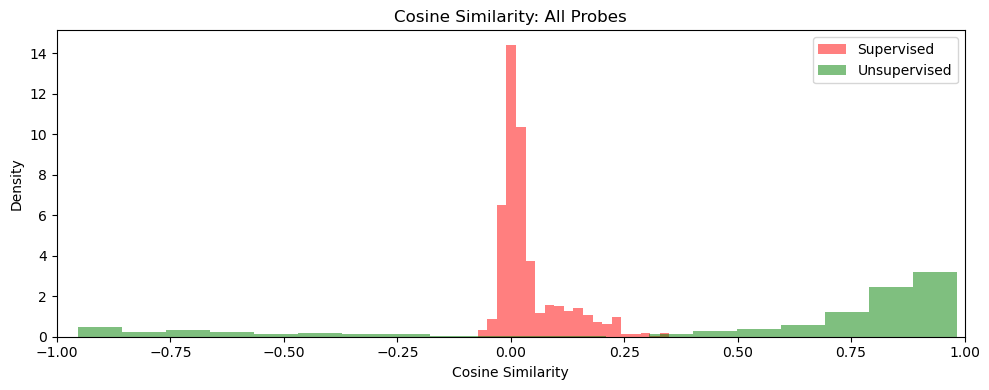

In [29]:
all_sims = {"s": [], "u": []}
for type in ["s", "u"]:
    for model in models:
        probes = []
        for dataset in ["newsroom", "summeval", "hanna"]:
            path = f"{collated_results_path}/{dataset}/{model}/probe_{type}.pt"
            probe = t.load(path, weights_only=True)
            probes.append(probe)
        probes = t.cat(probes, dim=0)
        sims = []
        for i in range(len(probes)):
            for j in range(len(probes)):
                if i == j: continue
                sims.append(F.cosine_similarity(probes[i], probes[j], dim=0))
        all_sims[type] += sims

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(all_sims["s"], color="red", alpha=0.5, density=True, bins=20, label="Supervised")
ax.hist(all_sims["u"], color="green", alpha=0.5, density=True, bins=20, label="Unsupervised")
ax.set_xlabel("Cosine Similarity"); ax.set_ylabel("Density")
ax.set_title("Cosine Similarity: All Probes")
ax.set_xlim(-1, 1)
ax.legend()
plt.tight_layout()
plt.show()

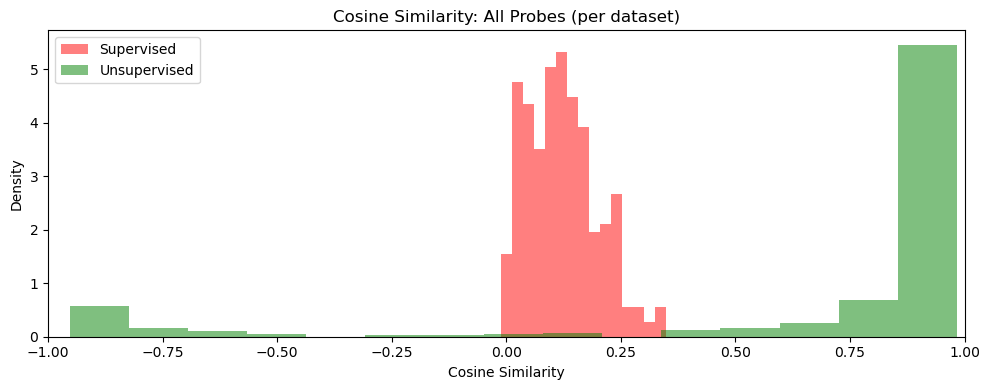

In [30]:
all_sims = {"s": [], "u": []}
for type in ["s", "u"]:
    for model in models:
        for dataset in ["newsroom", "summeval", "hanna"]:
            path = f"{collated_results_path}/{dataset}/{model}/probe_{type}.pt"
            probes = t.load(path, weights_only=True)
            sims = []
            for i in range(len(probes)):
                for j in range(len(probes)):
                    if i == j: continue
                    sims.append(F.cosine_similarity(probes[i], probes[j], dim=0))
            all_sims[type] += sims

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(all_sims["s"], color="red", alpha=0.5, density=True, bins=15, label="Supervised")
ax.hist(all_sims["u"], color="green", alpha=0.5, density=True, bins=15, label="Unsupervised")
ax.set_xlabel("Cosine Similarity"); ax.set_ylabel("Density")
ax.set_title("Cosine Similarity: All Probes (per dataset)")
ax.set_xlim(-1, 1)
ax.legend()
plt.tight_layout()
plt.show()

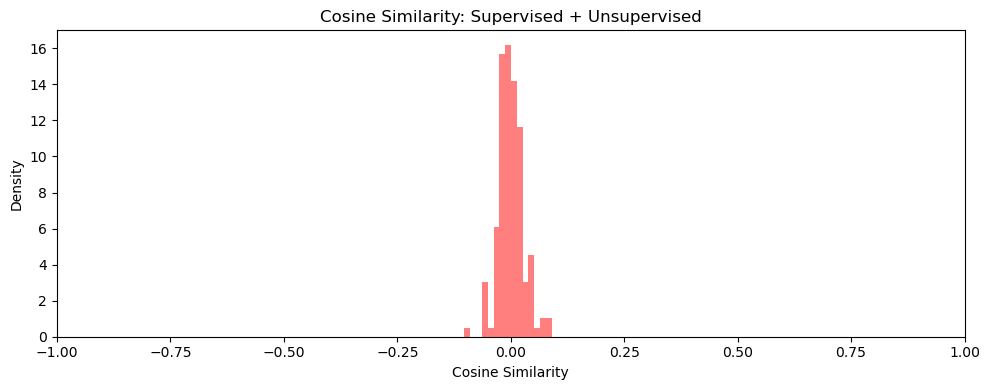

In [31]:
all_sims = []
for model in models:
    for dataset in ["newsroom", "summeval", "hanna"]:
        path_s = f"{collated_results_path}/{dataset}/{model}/probe_s.pt"
        path_u = f"{collated_results_path}/{dataset}/{model}/probe_u.pt"
        probes_s = t.load(path_s, weights_only=True)
        probes_u = t.load(path_u, weights_only=True)
        for i in range(len(probes_s)):
            all_sims.append(F.cosine_similarity(probes_s[i], probes_u[i], dim=0))

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(all_sims, color="red", alpha=0.5, density=True, bins=15)
ax.set_xlabel("Cosine Similarity"); ax.set_ylabel("Density")
ax.set_title("Cosine Similarity: Supervised + Unsupervised")
ax.set_xlim(-1, 1)
plt.tight_layout()
plt.show()